In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tkinter import *
import time
from PIL import Image, ImageTk

# 1. Условие задачи
Рассмотрим процесс сближения космического аппарата с Луной в условиях, когда притяжением других тел Солнечной системы можно пренебречь. В этих условиях движение аппарата будет определяться лунной силой тяжести, а также силой тяги собственного реактивного двигателя аппарата.

Пусть начальная масса аппарата $m_0 = 400$ кг и она уменьшается по мере расхода топлива. Пусть запас топлива $m_f = 450$. Предположим, что в начальный момент времени $t=0$ аппарат на некотором расстоянии $R_0$ от центра Луны (радиус Луны $R_л = 1737$) и начинает свою посадку со скоростью $v_0$. Расход топлива в единицу времени $q = \frac{dm_f(t)}{dt}$ может задаваться на нужном уровне. Скорость истечения рабочих газов из сопла реактивного двигателя примерно равна $u=2$ км/ч. Двигатель включается в начальный момент времени и создаёт тормозящее усилие до момента прилунения или до полного израсходования топлива.

Итоговой целью нашей работы мы считаем расчёт оптимального значения расхода топлива в единицу времени, при котором происходит достаточно мягкая посадка на поверхность Луны

In [3]:
#Ускорение свободного падения
g = 1.62
#Масса аппарата в t0
m0 = 400
#Масса топлива в t0
mf = 350
#Расстояние до центра в t0
R0 = 7*(10**6)
#Радиус Луны
Rl = 1737000
#начальная скорость
v0 = -9000
#Скорость газов
u = 2500
#Расход топлива
q = 1

Как известно ещё из курса школьной физики, движение описывается вторым законом Ньютона, и мы поступим также

$\displaystyle \sum_{i=1}^n F_{внеш_i} = \frac{dp}{dt}$

Как известно

$p(t) = v(t)m(t)$

Тогда

$\displaystyle \sum_{i=1}^n F_{внеш_i} = \frac{dp}{dt} = m(t)\frac{dv}{dt} + v(t)\frac{dm}{dt}$


В ходе движения на наш аппарат действуют 2 внешние силы: сила тяги, возникающая в ходе реактивного движения, и сила тяжести, следовательно, получаем

$\displaystyle \sum_{i=1}^n F_{внеш_i} = -m(t)g + F_{тяг}$

Для дальнейших рассуждений введём вспомогательную функцию, которая будет описывать массу аппарата в зависимости от времени

$m(t) = m_0 - m_f(t)$

Здесь $m_f(t)$ – функция, описывающая зависимость массы топлива в аппарате от времени.

Продифференцируем полученную вспомогательную функцию

$\displaystyle \frac{dm}{dt} = -\frac{dm_f}{dt} = -q$

По определению, скорость – первая производная от координаты

$\displaystyle \frac{dv}{dt} = \frac{d^2h}{dt} = h''(t)$

Здесь была введена функция $h(t)$ – функция, описывающая изменение высоты, на которой находится аппарат с течением времени.

Тогда  можно получить следующее уравнение для $F_{тяг}$

$\displaystyle F_{тяг} = u\frac{dm_f}{dt} = uq$

В итоге приходим к следующему уравнению

$-m(t)g + uq = m(t)h''(t) + qh'(t)$

Тогда

$\displaystyle h''(t) = \frac{-m(t)g + q(u - h'(t))}{m(t)}$

Используя начальные условия, поставим задачу Коши, с помощью которой будем получать значения функций $h(t)$ и $h'(t)$

$\displaystyle h''(t) = \frac{-m(t)g + q(u - h'(t))}{m(t)}$

$h(0) = R_0 - R_л$

$h'(0) = v_0$

Сделаем замену $h'(t) = v(t)$, и составим систему дифференциальных уравнений для решения поставленной задачи относительно функций $h(t)$ и $v(t)$

$h'(t) = v(t)$

$\displaystyle v'(t) = \frac{-m(t)g + q(u - v(t))}{m(t)}$

$h(0) = R_0 - R_л$

$v(0) = v_0$

# 2. Численное решение задачи
Для решения задачи будем использовать метод Рунге-Кутты четвёртого порядка точности. Запишем его в виде системы

$\displaystyle y_{i+1} = y_i + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 +k_4 \right)$

$k_1 = f(t_i, y_i)$

$\displaystyle k_2 = f\left( t_i + \frac{h}{2}, y_i +h  \frac{k_1}{2}\right)$

$\displaystyle k_3 = f\left( t_i + \frac{h}{2}, y_i +h  \frac{k_2}{2}\right)$

$\displaystyle k_4 = f\left( t_i + h, y_i +h  k_3\right)$

In [10]:
#Изменение массы
def funcMas(h):
    return(m0 - h*q)
#вспомогательные функции для метода Рунге-Кутты 4-ого порядка точности

def FR1(t, v, t0, q):
    return v

def FR2(t, v, t0, q):
    return ((-funcMas(t0)*g+q*(u-v))/funcMas(t0))

def K1(y, t, FR, q):
    return FR(t, y, t, q)

def K2(y, t, h, K1, FR, q):
    return FR(t + h/2, y + (h * K1)/2, t, q)

def K3(y, t ,h, K2, FR, q):
    return FR(t + h/2, y + (h*K2)/2, t, q)

def K4(y, t ,h, K3, FR, q):
    return FR(t + h, y + h*K3, t, q)

#вспомогательная функция для возвращения y_i+1
def funcH1 (y, h, K1, K2, K3, K4):
    return y + (h/6)*(K1+2*K2+2*K3+K4)

#Метод Рунге-Кутты 4 порядка с заданным шагом
def RungKutt (h, High0, v0, q):
    y = [[],[],[]]
    y[0].append(High0)
    y[1].append(v0)
    y[2].append(350)
    flag = -1
    i = 1
    while (flag == -1):

        if (funcMas((i-1)*h) <= m0 - mf):
            flag = 2
            break
        
        #Высчитываем h
        K1ex = K1(y[1][i-1], (i-1)*h, FR1, q)
        K2ex = K2(y[1][i-1], (i-1)*h, h, K1ex, FR1, q)
        K3ex = K3(y[1][i-1], (i-1)*h, h, K2ex, FR1, q)
        K4ex = K4(y[1][i-1], (i-1)*h, h, K3ex, FR1, q)
        y[0].append(funcH1(y[0][i-1], h, K1ex, K2ex, K3ex, K4ex))
        
        #Высчитываем v
        K1ex = K1(y[1][i-1], (i-1)*h, FR2, q)
        K2ex = K2(y[1][i-1], (i-1)*h, h, K1ex, FR2, q)
        K3ex = K3(y[1][i-1], (i-1)*h, h, K2ex, FR2, q)
        K4ex = K4(y[1][i-1], (i-1)*h, h, K3ex, FR2, q)
        y[1].append(funcH1(y[1][i-1], h, K1ex, K2ex, K3ex, K4ex))
        if (y[0][i] < 0) : flag = 0
        if (y[1][i] > 0) : flag = 1
        y[2].append(funcMas((i-1)*h)-50)
        
        i+=1
    
    return y, flag
#Рисования анимации прилунения
def DrawAnimation(mas):
    #win = Tk()
    win = Toplevel()
    win.geometry("700x700")
    mx = 1000
    my = 750
    c = Canvas(win, width=mx, height=my)
    c.pack(pady=20)
    #Нарисую и сгруппирую ракету и луну
    imagemoon = ImageTk.PhotoImage(Image.open('C://moon.jpg'))
    imgmoon = c.create_image(0, 0, anchor=NW, image=imagemoon)
    imagerocet = ImageTk.PhotoImage(Image.open('C://rocet.png'))
    imgroc = c.create_image(500, 0, anchor=NW, image=imagerocet)
    #Для действительного отображения определю на какой высоте остановилась ракеты
    razn = mas[0][len(mas[0])-1]//11695
    #razn = 500000//11695
    print(mas[0][len(mas[0])-1])
    #Напишу текст
    c.create_text(75, 50, text="Текущая высота:", fill = "white", font=("Times", 15))
    c.create_text(83, 85, text="Текущая скорость:", fill = "white", font=("Times", 15))
    c.create_text(80, 120, text="Остаток топлива:", fill = "white", font=("Times", 15))
    #Наши изменяющиеся параметры
    tHe = str(mas[0][0])
    tSp = str(np.abs(mas[1][0]))
    tFuel = str(mas[2][0])
    c.create_text(275, 50, text=tHe, fill = "white", font=("Times", 15))
    c.create_text(275, 85, text=tSp, fill = "white", font=("Times", 15))
    c.create_text(275, 120, text=tFuel, fill = "white", font=("Times", 15))
    #Для корректного изменения скорости и высоты
    kef = int(len(mas[0])//(450-razn))
    for i in range(int(450-razn)):
        #Обновляем текущие параметры
        tHe = str(mas[0][i*kef])
        tSp = str(np.abs(mas[1][i*kef]))
        tFuel = str(mas[2][i*kef])
        c.create_rectangle(165, 10, 400, 175, fill="black", width=3)
        c.create_text(275, 50, text=tHe, fill = "white", font=("Times", 15))
        c.create_text(275, 85, text=tSp, fill = "white", font=("Times", 15))
        c.create_text(275, 120, text=tFuel, fill = "white", font=("Times", 15))
        c.move(imgroc, 0, 1)
        win.update()
        time.sleep(0.005)
    #Записываю финальные парметры
    tHe = str(mas[0][len(mas[0])-1])
    tSp = str(np.abs(mas[1][len(mas[1])-1]))
    tFuel = str(mas[2][len(mas[2])-1])
    c.create_rectangle(165, 10, 400, 175, fill="black", width=3)    
    c.create_text(275, 50, text=tHe, fill = "white", font=("Times", 15))
    c.create_text(275, 85, text=tSp, fill = "white", font=("Times", 15))
    c.create_text(275, 120, text=tFuel, fill = "white", font=("Times", 15))
    win.mainloop()


def ShowResult(mas, fl):
    if (fl == 2):
        print("В аппарате кончилось топливо")
        print("Oн находится на высоте", mas[0][len(mas[0])-1], "м")
        print("И летит со скоростью", mas[1][len(mas[1])-1], "м/с")
    if (fl == 0):print("Аппарат достиг луны со скоростью", mas[1][len(mas[1])-1], "м/с")
    if (fl == 1):print("Аппарат полностью остановился на высоте", mas[0][len(mas[0])-1], "м от луны")

#Шаг в секундах
h = 0.001

Проведём тесты с заданным $q$

In [11]:
q = 0.5
mas, fl = RungKutt(h, R0 - Rl, v0, q)
ShowResult(mas, fl)

Аппарат полностью остановился на высоте 2228487.641904112 м от луны


In [12]:
q = 0.4
mas, fl = RungKutt(h, R0 - Rl, v0, q)
ShowResult(mas, fl)

Аппарат полностью остановился на высоте 1400294.0402268858 м от луны


In [13]:
q = 0.3
mas, fl = RungKutt(h, R0 - Rl, v0, q)
ShowResult(mas, fl)

Аппарат достиг луны со скоростью -917.272164606509 м/с


При $q=0.3$ появляется новая ситуация: аппарат не успел полностью остановиться, и достиг поверхности Луны с достаточно большой скоростью.

Оптимальное значение $q$ находится на отрезке $[0.3, 0.4]$, так как при значении $q=0.4$ расход получается слишком большим, поэтому всё топливо сгорает до момента посадки, и аппарат останавливается на большой высоте. С другой стороны, при $q=0.3$ расход слишком маленький, и аппарат не успевает остановиться.

Для того чтобы вручную не подбирать расход топлива, была разработана функция вычисления оптимального расхода для достаточно мягкой посадки аппарата, именно она позволяет упростить процесс подбора. 

Опишем её алгоритм:
Функция в качестве входных параметров получает следующие значения: $h$ - шаг для метода решения задачи Коши, $R$ – расстояние до центра Луны в момент времени $t = 0$ и $v_0$ – скорость аппарата в момент начала процесса прилунения. Далее вводим вспомогательные переменные: $levot$ – левая граница отрезка локализации оптимального расхода топлива, $prot$ – правая; $vr$ – начальное значение оптимального расхода топлива, которое будет меняться в рамках отрезка ; $k$ – шаг, с которым мы будем идти по отрезку ; $flagost$ – логическая переменная для остановки цикла, начальное значение - $True$.

Запускаем цикл $while$. 

Далее с помощью метода Рунге-Кутты 4-ого порядка находим значение высоты, на которой произошла остановка или значение скорости, с которой приземлился аппарат, также получаем значение переменной $flagvr$, которая отвечает за номер ситуации (0 – аппарат достигает луны с какой-то скоростью; 1 - остановка аппарата на какой-то высоте, но топливо не закончилось; 2 – в аппарате кончается топливо). 

Теперь сравниваем полученные значения высоты и скорости с двумя константами: 3 м, -2 м/c. Эти данные мы посчитали приемлемыми для того, чтобы аппарат совершил мягкую посадку. (*)

Если высота меньше 3 метров, а скорость больше, чем -2 метра в секунду, то выходим из цикла $while$, при этом возвращая значение расхода, при котором были получены данные высота и скорость. 

Далее, если $flagvr$ = 1 или $flagvr$ = 2, то был найден нужный нам отрезок локализации, на котором находится искомое значение расхода. Теперь мы записываем в $prot$ значение $vr$, а в $levot$ значение $vr-k$, уменьшаем $k$ в 10 раз, дабы на следующем шаге цикла рассматривать новый отрезок $[levot, prot]$ с шагом в 10 раз меньше, присваиваем $vr$ значение $levot$. Если же отрезок не найден, то делаем увеличиваем значение $vr$ на $k$.

После всех манипуляций повторяем алгоритм до тех пор, пока наши значения не будут удовлетворять константам из (*).

Пример: мы нашли промежуток, который нам подходит [0.2; 0.3]. Повышаем порядок поиска, и теперь проходимся по всем сотым между [0.2, 0.3]: [0.2,0.21], [0.21, 0.22], [0.22, 0.23]. 

Как только нашли новый отрезок начинаем поиск внутри него по тысячным. 
Поиск прекращается, когда левый конец отрезка будет удовлетворять благоприятным условиям посадки ракеты.

In [14]:
def findFuelCons(h, R, v0):
    levot = 0
    prot = 0.1
    vr = 0
    k = 0.1
    kForRound = 1
    while(True):
        masvr, flagvr = RungKutt(h, R - Rl, v0, vr)
        if ((masvr[0][len(masvr[1])-1] < 3)and(masvr[1][len(masvr[1])-1] > - 2)):
            return(vr)
        if ((flagvr == 1)or(flagvr == 2)):
            prot = round(vr, kForRound)
            levot = round(vr - k, kForRound)
            kForRound += 1
            k=round(k*0.1, kForRound)
            vr = round(levot, kForRound)
        else:
            vr = round(vr + k, kForRound)

In [15]:
qres = findFuelCons(h, R0, v0)
print('Оптимальный расход топлива равен', qres)
mas, fl = RungKutt(h, R0 - Rl, v0, qres)
ShowResult(mas, fl)

Оптимальный расход топлива равен 0.3036811
Аппарат полностью остановился на высоте 0.2740444739454272 м от луны


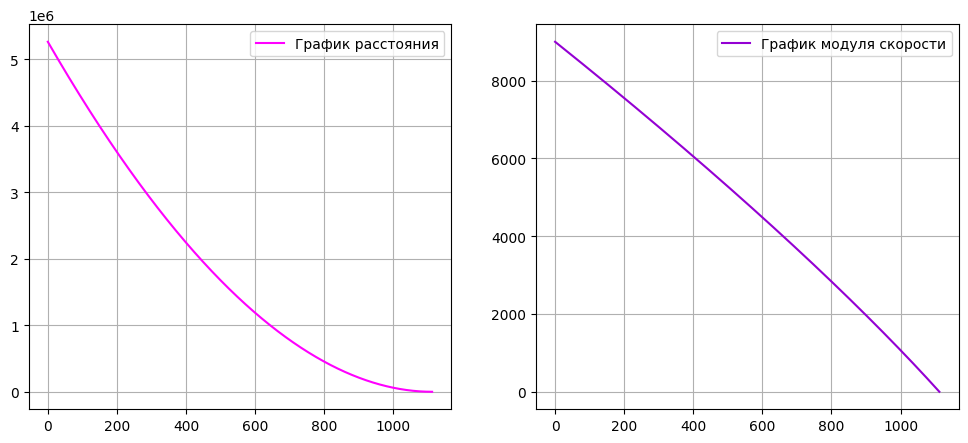

In [16]:
#Нарисую графики изменения скорости и расстояния до луны
#Сформирую ось x
xline = np.zeros(len(mas[0]))
for i in range(len(mas[0])):
    xline[i] = i*h
fig, axs = plt.subplots(1, 2, figsize=[12, 5])
#Сформирую наши массивы значений
axs[0].plot(xline, np.abs(mas[0]), color = 'fuchsia', label = "График расстояния")
axs[1].plot(xline, np.abs(mas[1]), color = 'darkviolet', label = "График модуля скорости")
for i in range(2):
    axs[i].grid()
    axs[i].legend()
plt.show()

Получается, отрезок локализации был выбран правильно. Оптимальным значением является $q = 0.3036811$. При этом аппарат остановился от Луны на расстоянии, которое чуть больше, чем 25 см, что не является критическим, если учесть расстояния, которыми оперируют в астрофизике

В заключении хотелось бы отметить и обобщить полученные результаты. При выполнении курсовой работы основной задачей  было нахождение оптимального расхода топлива, при котором аппарат будет совершать мягкую посадку. Результатом работы стало значение расхода, при котором возникает ситуация полной остановки аппарата на достаточно малой высоте. Это расстояние может быть пройдено аппаратом под действием собственной силы тяжести. В силу того, что оно мало, аппарат не сможет достичь скорости, способной навредить ему при посадке. 

Резюмируя всё вышесказанное, мы считаем, что наша цель достигнута.

# Список использованных источников
1. Muresan Marian. Мягкая посадка на Луну при помощи математики // Математический журнал – 2012. Вып. (14).

2. Амосов А. А., Дубинский Ю. А., Копченова Н.В. Вычислительные методы. М: Издательский дом МЭИ, 2003

3. https://www.nasa.gov/pdf/377727main_Lunar_Math.pdf (дата обращения 07.12.2022)